In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

# Visualization

In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
%%R

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('tidyverse')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Rows: 5 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Category
dbl (1): project_numbers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


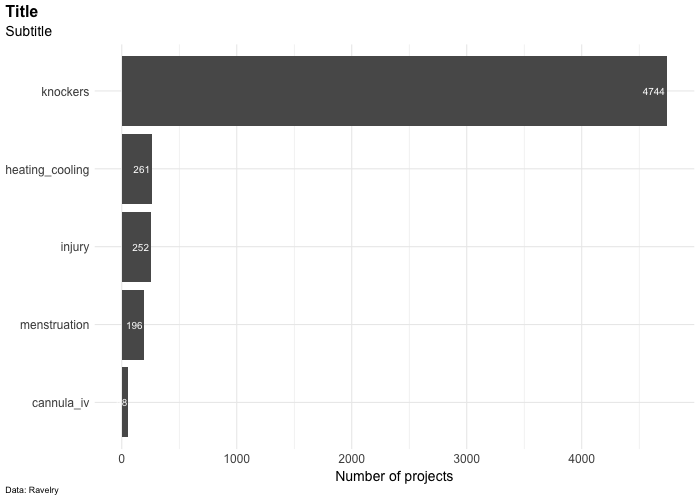

In [7]:
%%R -h 500 -w 700

df <- read_csv('data/categories.csv')

ggplot(df, aes(y = reorder(Category, project_numbers), x = project_numbers)) + 
    geom_bar(stat = 'identity') +
    geom_text(aes(label=project_numbers), hjust=1.1, color="white", size=3.5) +
    theme_minimal() +
    labs(x = "Number of projects", y = NULL ,
       title = "Title",
       subtitle = "Subtitle",
       caption = "Data: Ravelry")  +
    theme(axis.title.x = element_text(vjust = 0, size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot")

Rows: 13 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Category, category_simple
dbl (1): project_numbers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


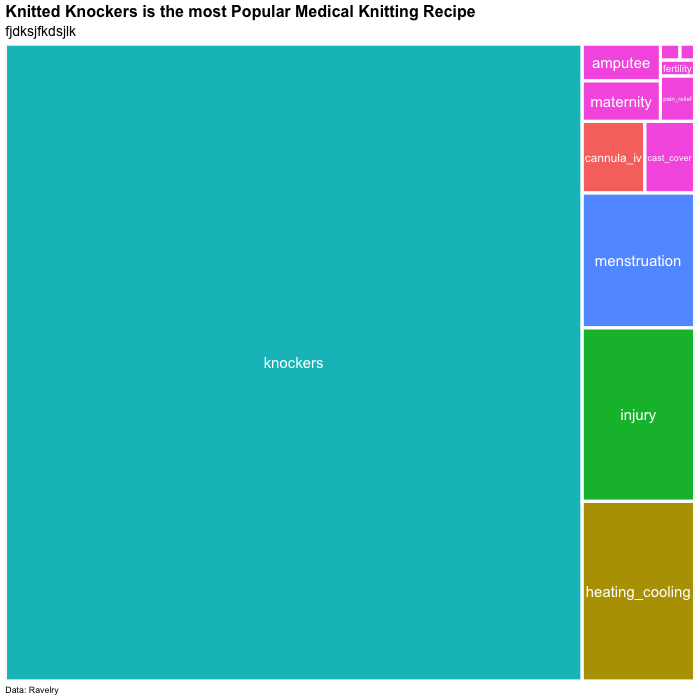

In [51]:
%%R -h 700 -w 700

data <- read_csv('data/treemap.csv')
library(treemapify)

ggplot(data, aes(area = project_numbers, fill = category_simple, label = category_simple, subgroup = Category, subgroup2 = Category)) +
  geom_treemap() +
  geom_treemap_subgroup2_border(colour = "white", size = 2) +
  geom_treemap_subgroup_border(colour = "white", size = 4) +
  geom_treemap_subgroup_text(
    place = "middle",
    colour = "white",
    size = 15) +
  labs(
    title = "Knitted Knockers is the most Popular Medical Knitting Recipe",
    subtitle = "fjdksjfkdsjlk",
      caption = "Data: Ravelry")  +
  theme(legend.position = "none",
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 14),
    plot.caption = element_text(hjust = 0))

ggsave("visuals/treemap1.pdf", dpi = 300)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


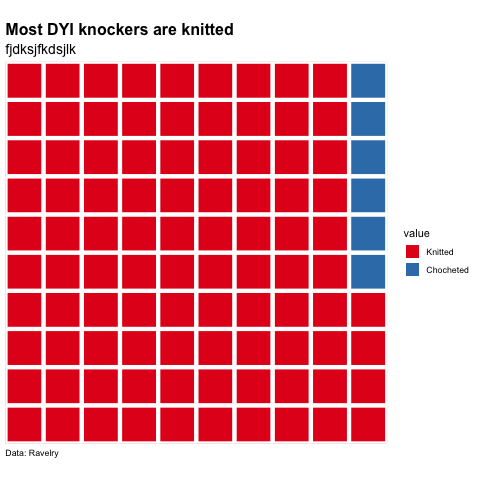

In [10]:
%%R
library(waffle)
library(htmltools)

df <- c(`Knitted`=94, `Chocheted`=6)

waffle(df, rows=10) +
    scale_fill_brewer(palette="Set1") +
    labs(
       title = "Most DYI knockers are knitted",
       subtitle = "fjdksjfkdsjlk",
       caption = "Data: Ravelry")  +
    theme(
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot")
    

Rows: 10 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Area, Cancer Type, Sex, Race
dbl (4): Year, Age-Adjusted Rate, Case Count, Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


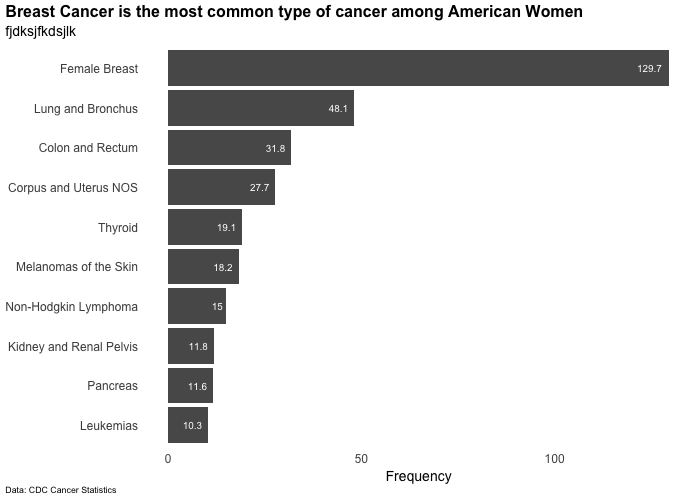

In [32]:
%%R -h 500 -w 700

df <- read_csv('data/cancer_stats.csv')

ggplot(df, aes(y = reorder(`Cancer Type`, `Age-Adjusted Rate`), x = `Age-Adjusted Rate`)) + 
    geom_bar(stat = 'identity') +
    geom_text(aes(label=`Age-Adjusted Rate`), hjust=1.3, color="white", size=3.5) +
    theme_minimal() +
    labs(x = "Frequency", y = NULL ,
       title = "Breast Cancer is the most common type of cancer among American Women",
       subtitle = "fjdksjfkdsjlk",
       caption = "Data: CDC Cancer Statistics")  +
    theme(axis.title.x = element_text(vjust = 0, size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

#ggsave("visuals/cancer.pdf", dpi = 300)

Rows: 43 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, type
dbl (1): price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


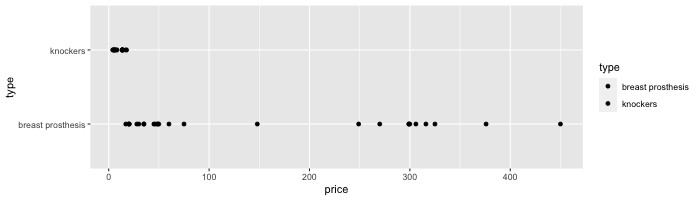

In [12]:
%%R -h 200 -w 700

df <- read_csv('data/comparison.csv')

ggplot(df, aes(x = price, y = type, fill = type)) +
    geom_point()

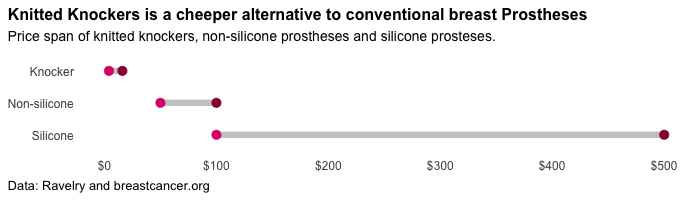

In [67]:
%%R -w 700 -h 200

data <- tibble::tribble(~type, ~min, ~max,
                        "Knocker", 4, 16,
                        "Non-silicone", 50,  100,
                        "Silicone", 100,  500
                        )
data$type <- fct_reorder(data$type, data$min, .desc = TRUE)

data %>%
  ggplot(aes(x = type)) +
  geom_linerange(aes(ymin = min, ymax = max, x = type),
                 size = 3, alpha = 0.25) +
  geom_point(aes(y = min), colour = "#DD1C77", size = 4) +
  geom_point(aes(y = max), colour = "#980043", size = 4) +
  coord_flip() +
  scale_y_continuous(labels = scales::dollar_format()) +
  labs(x = NULL, y = NULL ,
       title = "Knitted Knockers is a cheeper alternative to conventional breast Prostheses",
       subtitle = "Price span of knitted knockers, non-silicone prostheses and silicone prosteses.",
       caption = "Data: Ravelry and breastcancer.org")  +
  theme_minimal(base_size = 16) +
  theme(axis.title.x = element_text(vjust = 0, size = 14),
        axis.text = element_text(size = 12),
        axis.text.x = element_text(size = 12),
        plot.title = element_text(size = 16, face = "bold"),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(hjust = 0),
        plot.title.position = "plot",
        plot.caption.position = "plot",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

ggsave("visuals/prices.pdf", dpi = 300)